## Select samples with different magnitude cuts.  --06-26-2025

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys
import numpy as np
import fitsio
from astropy.table import Table

In [3]:
##idir0 = "/home/xhyang/work/Gfinder/DESIDR9/data/"
idir0 = "/home/yrwang/work_wyr/DESI_DR9/new_catalogue/"

filename = "DESIDR9_galaxy.npy"

In [4]:
%%time
gal_cat = np.load(idir0+filename)

CPU times: user 0 ns, sys: 8 s, total: 8 s
Wall time: 13.9 s


In [7]:
gal_cat.shape

(138315649, 15)

In [8]:
gal_cat

array([[ 0.00000000e+00,  9.73989646e+01,  7.84766830e+01, ...,
        -6.29385829e-01,  2.16256237e+01,  1.00000000e+00],
       [ 1.00000000e+00,  9.74072612e+01,  7.85689539e+01, ...,
         8.16256881e-01,  2.29133530e+01,  1.00000000e+00],
       [ 2.00000000e+00,  9.74098214e+01,  7.84171062e+01, ...,
        -3.35482657e-01,  2.14322128e+01,  1.00000000e+00],
       ...,
       [ 1.38315646e+08,  3.51571224e+02,  3.40134471e+01, ...,
        -4.25333828e-01,  2.13322906e+01,  1.00000000e+00],
       [ 1.38315647e+08,  3.51571608e+02,  3.39438549e+01, ...,
        -2.66461134e-01,  1.94252491e+01,  0.00000000e+00],
       [ 1.38315648e+08,  3.51571611e+02,  3.40092945e+01, ...,
        -4.27486420e-01,  2.13678932e+01,  1.00000000e+00]])

In [12]:
%%time
columns = ["gal_id", "RA", "DEC", "z", "Z_absmag", "Z_L", "R_absmag", "R_L", "zerr", "logMstar", "Z_kcorr", "Z_appmag", "R_kcorr", "R_appmag", "select"]
##data_type = [('gal_id', 'i8'), ('RA', 'f4'), ('DEC', 'f4'), ("z", 'f4'), ("Z_absmag", 'f4'), ("Z_L", 'f4'), ("R_absmag", 'f4'), ("R_L", 'f4'), ("zerr", 'f4'), ("logMstar", 'f4'), ("Z_kcorr", 'f4'), ("Z_appmag", 'f4'), ("R_kcorr", 'f4'), ("R_appmag", 'f4'), ("select", 'i4')]
gal_cat = Table(gal_cat, names = columns)
gal_cat

CPU times: user 3.3 s, sys: 3.53 s, total: 6.83 s
Wall time: 6.82 s


gal_id,RA,DEC,z,Z_absmag,Z_L,R_absmag,R_L,zerr,logMstar,Z_kcorr,Z_appmag,R_kcorr,R_appmag,select
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,97.39896455348688,78.47668295763336,0.3817688822746277,-19.378753795716193,9.683501518286477,-18.523034676405814,9.565213870562326,0.07345464080572128,9.72371768951416,-0.47307080030441284,20.926490783691406,-0.6293858289718628,21.62562370300293,1.0
1.0,97.4072611638097,78.56895388549455,0.942081093788147,-22.199963320398012,10.811985328159205,-21.04933627357451,10.575734509429806,0.20936688780784607,10.928688049316406,-0.10994037985801697,20.8456974029541,0.8162568807601929,22.913352966308594,1.0
2.0,97.40982141961794,78.41710616978406,0.5803049802780151,-20.583067403162204,10.165226961264882,-20.09233258756467,10.192933035025868,0.07987365126609802,9.729487419128418,-0.3231440484523773,20.953453063964844,-0.335482656955719,21.432212829589844,1.0
3.0,97.41315862905633,78.40450000094273,0.4381779134273529,-21.47952006347372,10.523808025389489,-20.44899661429121,10.335598645716486,0.054174166172742844,10.665435791015625,-0.47184574604034424,19.184791564941406,-0.5844707489013672,20.099506378173828,1.0
4.0,97.41667091690539,78.50063218008853,0.5949360132217407,-21.03363141329345,10.34545256531738,-20.092613696170417,10.193045478468168,0.16443847119808197,10.227652549743652,-0.36841368675231934,20.529043197631836,-0.24334026873111725,21.58721351623535,1.0
5.0,97.42059145285631,78.39016480972529,0.5318899154663086,-20.831276609619806,10.264510643847922,-19.772714956721018,10.065085982688409,0.05327216908335686,10.445337295532227,-0.39621812105178833,20.404409408569336,-0.3527913987636566,21.512720108032227,1.0
6.0,97.4222782512624,78.58547948653145,0.6445044279098511,-21.419940266866575,10.49997610674663,-20.911199603338133,10.520479841335254,0.0817503109574318,10.24426555633545,-0.35645437240600586,20.360429763793945,-0.25699302554130554,20.96501922607422,1.0
7.0,97.42554759155851,78.46643373407663,0.7112349271774292,-21.488264960139674,10.52730598405587,-20.866982263415736,10.502792905366295,0.0662883073091507,10.355422019958496,-0.33005669713020325,20.579893112182617,-0.048287637531757355,21.474641799926758,1.0
8.0,97.4273696092702,78.42345079493901,0.3899470865726471,-19.800817456469304,9.852326982587721,-18.796619560942418,9.674647824376969,0.05752764642238617,10.000404357910156,-0.4696398973464966,20.561565399169922,-0.6723949909210205,21.364166259765625,1.0


In [14]:
gal_cat['gal_id'] = gal_cat['gal_id'].astype(int)

In [16]:
gal_cat['select'] = gal_cat['select'].astype(int)

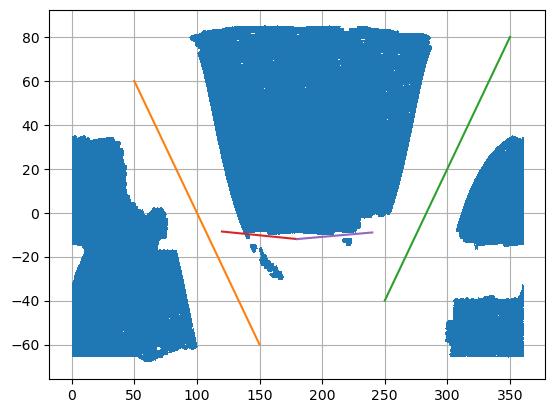

In [17]:
plt.plot(gal_cat['RA'][::50], gal_cat['DEC'][::50], ',')

plt.grid()

## select NGC part
xx = np.linspace(50, 150, 100)
a1 = (0 - 60.0)/(100-50)
b1 = 60 - 50*a1
yy = a1*xx+b1
plt.plot(xx, yy)

xx = np.linspace(250, 350, 100)
a2 = (20.0 + 40.0)/(300-250)
b2 = -40 - a2*250
yy = a2*xx+b2
plt.plot(xx, yy)

## skip small inlands
xx = np.linspace(120, 180, 100)
a3 = (-12 + 10.0)/(180-145)
b3 = -12 - a3*180
yy = a3*xx+b3
plt.plot(xx, yy)

xx = np.linspace(180, 240, 100)
a4 = (-10+12)/(220-180)
b4 = -12 - 180*a4
yy = a4*xx+b4
plt.plot(xx, yy)
# plt.xlim([100, 250])
# plt.ylim([-15, -1])

In [18]:
ngc_mask  = gal_cat['DEC']>(a1*gal_cat['RA']+b1)
ngc_mask &= gal_cat['DEC']>(a2*gal_cat['RA']+b2)
ngc_mask &= gal_cat['DEC']>(a3*gal_cat['RA']+b3)
ngc_mask &= gal_cat['DEC']>(a4*gal_cat['RA']+b4)

## load group catalog

In [19]:
idir_group = "/home/xhyang/work/Gfinder/DESIDR9/data/"
filename = "DESIDR9_NGC_group"

In [21]:
%%time
group_cat = np.loadtxt(idir_group + filename)

CPU times: user 22.2 s, sys: 1.41 s, total: 23.6 s
Wall time: 24.2 s


In [22]:
%%time
columns = ['group_id', 'richness', 'RA', 'DEC', 'Z', 'logMh', 'L_group']

group_cat = Table(group_cat, names = columns)
group_cat

CPU times: user 1.54 s, sys: 659 ms, total: 2.2 s
Wall time: 2.19 s


group_id,richness,RA,DEC,Z,logMh,L_group
float64,float64,float64,float64,float64,float64,float64
1.0,695.0,231.1398,29.8822,0.1163,15.3436,496.2779
2.0,626.0,250.099,46.6842,0.2353,15.4748,767.5737
3.0,561.0,213.6645,-0.3548,0.14,15.2748,463.0623
4.0,507.0,127.672,65.8657,0.1909,15.3472,589.2049
5.0,490.0,227.7732,5.8762,0.0799,15.1164,245.8985
6.0,490.0,229.1859,-0.8825,0.1212,15.2196,389.3267
7.0,452.0,203.84,41.0008,0.2408,15.2758,549.4326
8.0,444.0,260.637,32.119,0.228,15.2621,537.2723
9.0,437.0,255.9755,78.6183,0.0627,15.1194,218.0752


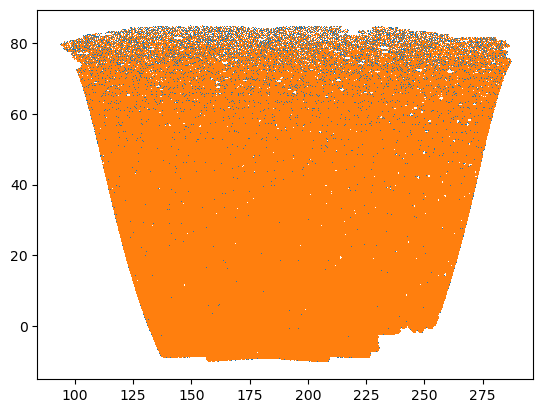

In [23]:
plt.plot(group_cat['RA'][::100], group_cat['DEC'][::100], ',')
plt.plot(gal_cat['RA'][ngc_mask][::200], gal_cat['DEC'][ngc_mask][::200], ',')

In [24]:
## add zmask with z>0
zmask = (gal_cat['z']>0.)

In [25]:
%%time

rmag_cut_list = [19.5, 20.0, 20.5, 21.0, 21.5]

for rmag_cut in rmag_cut_list:
    rmag_mask = (gal_cat['R_appmag'] > 0.0)&(gal_cat['R_appmag'] < rmag_cut)

    total_mask = rmag_mask&ngc_mask&zmask
    gal_sub = gal_cat[total_mask]

    ofile = f"./catalog/DESIDR9_galaxy_ngc_rmagcut{rmag_cut}.fits"
    gal_sub.write(ofile, overwrite=True)

CPU times: user 2min 6s, sys: 25.7 s, total: 2min 31s
Wall time: 2min 32s
